El objetivo de este libro es mostrar la capacidad del uso de la libreria Synthetic Data Vault (SDV) [link text](https://sdv.dev/) para generar datos sinteticos basados en unos datos reales.

Synthetic Data Vault (SDV) es una libreria de Python diseñada para ser su solución integral para crear datos sintéticos tabulares. SDV utiliza una variedad de algoritmos de Machine Learning para aprender patrones de sus datos reales y emularlos en datos sintéticos.

In [2]:
%pip install -qqq sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [3]:
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
"""
Leer los datos y asignar columnas
"""
def read_data():
  file_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
  df = pd.read_csv(f"{file_name}", sep=",", header=None, engine='python')
  COL_NAMES = ["wine_class", "alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "od280_od315_of_diluted_wines", "proline"]
  df.columns = COL_NAMES
  return df


In [8]:
COL_NAMES = ["wine_class", "alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "od280_od315_of_diluted_wines", "proline"]

In [30]:
wine_df = read_data()
wine_df.columns = COL_NAMES
wine_df.head()

,wine_class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [20]:
data = wine_df.iloc[: , 1:]
y = wine_df.iloc[: ,0].values

In [23]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)

synthesizer = CTGANSynthesizer(metadata, epochs=10)

# Fit el objeto synthesizer a data real
synthesizer.fit(data)

# Generar datos sinteticos
synthetic_data = synthesizer.sample(150)

# Guardar los datos a CSV
synthetic_data.to_csv('synthetic_wine_data.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:97: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


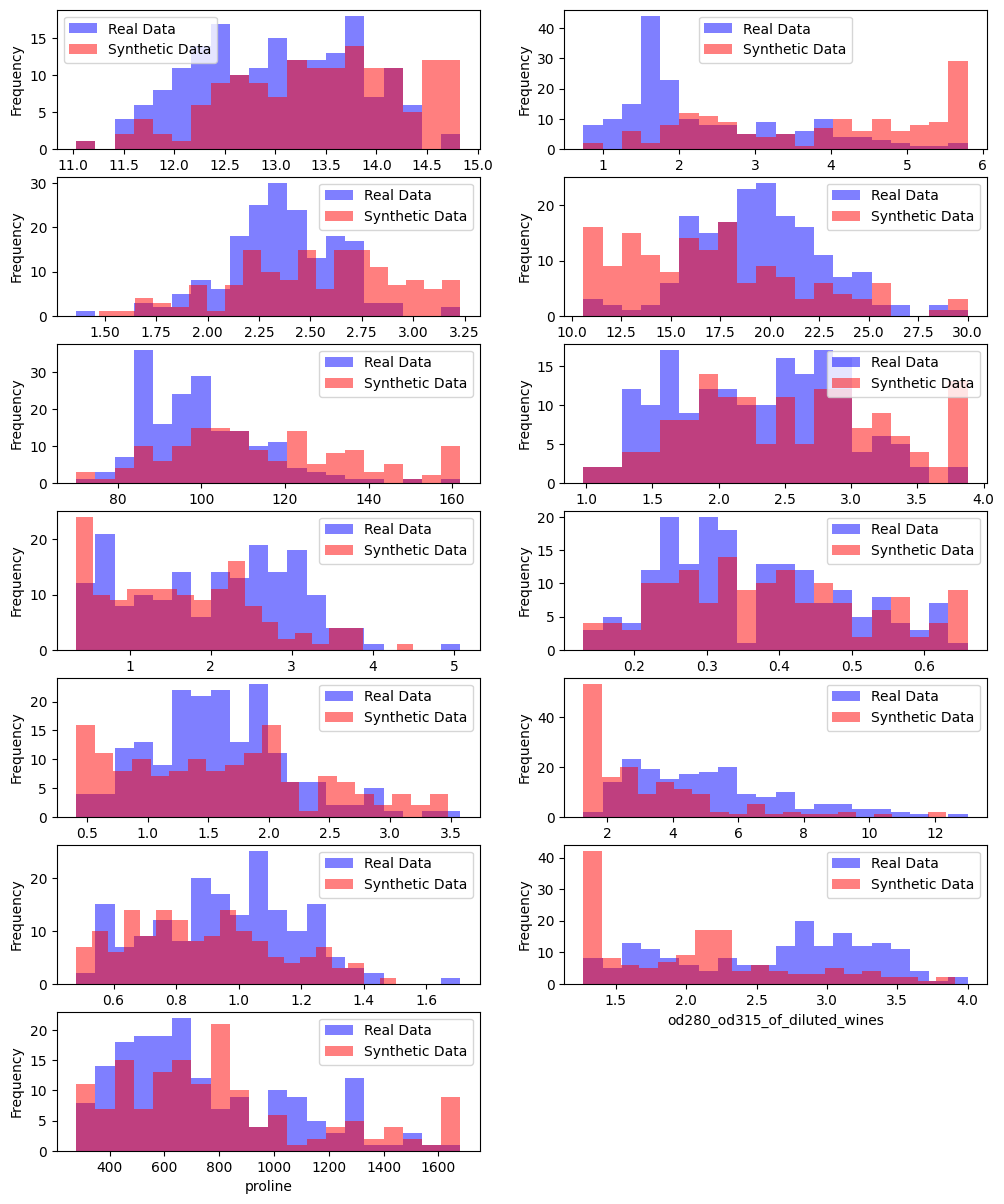

In [29]:
# Comparar los datos por varibales distribuidas
plt.figure(figsize=(12, 30))

# Iterar por cada columna apra graficar las distribuciones
for i in range(13):  # Son 13 features que tiene el dataset
    plt.subplot(14, 2, i+1)

    # Graficar histograma para datos reales
    plt.hist(data.values[:, i], bins=20, color='blue', alpha=0.5, label='Real Data')

    # Graficar histograma para synthetic data
    plt.hist(synthetic_data.values[:, i], bins=20, color='red', alpha=0.5, label='Synthetic Data')

    # Set labels and legend
    plt.xlabel(data.columns[i])
    plt.ylabel('Frequency')
    plt.legend()

plt.show()